# Day 1 Missing Values #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('titanic.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Embarked'].isnull().sum()

2

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [7]:
df['cabin_null'].mean() #finding the percentage of null values

0.7710437710437711

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [10]:
df['cabin_null'].value_counts()

1    687
0    204
Name: cabin_null, dtype: int64

In [11]:
df1=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [12]:
df1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [13]:
df1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

# We use Mean / Median/ Mode imputation when missing data is MCAR

In [14]:
def impute_nan1(df1,variable,median):
    df1[variable+"_median"]=df1[variable].fillna(median)

In [15]:
median=df1['Age'].median()
median

28.0

In [16]:
impute_nan1(df1,'Age',median)

In [17]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


# We have to Check distortion in the original variance after using Mean/ Median/ Mode

In [18]:
print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
%matplotlib inline

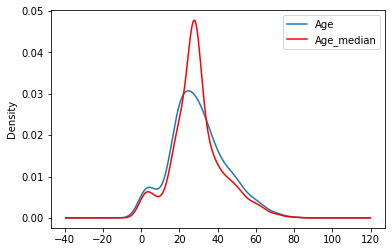

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
df1.Age.plot(kind='kde',ax=ax)
df1.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


## Day 2 Missing Values ##

In [21]:
df2= pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [22]:
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [25]:
df2['Age'].dropna().sample(df2['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

# Random Sample Imputation

In [27]:
def impute_nan2(data,variable,median):
    data[variable+"_median"]=data[variable].fillna(median)
    data[variable+"_random"]=data[variable]
    #it will have the random sample to fill na
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+"_random"]=random_sample

In [28]:
median=df2['Age'].median()

In [29]:
median

28.0

In [30]:
impute_nan2(df2,'Age',median)

In [31]:
df2.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


# Distortion is not happening with Random sample imputation

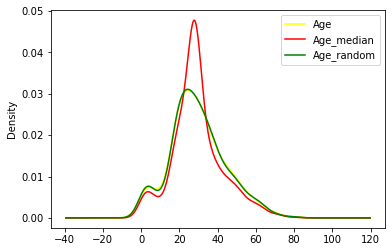

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
df2['Age'].plot(kind='kde', ax=ax,color='yellow')
df2['Age_median'].plot(kind='kde', ax=ax,color='red')
df2.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

# Capturing Nan Values with a new Features(used mostly for MNAR)

In [33]:
df3=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
##Replacing with median but creating addtional feature to add importance to missing values 
#suitable for less features as it can cause curse of dimensionality

In [35]:
df3['Age_na']=np.where(df3['Age'].isnull(),1,0)

In [36]:
df3.head()

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Age_na    891 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.5 KB


In [38]:
df3['Age'].median()

28.0

In [39]:
df3['Age'].fillna(df3['Age'].median(),inplace=True)

In [40]:
df3.head(10)

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution imputation

In [41]:
df4=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


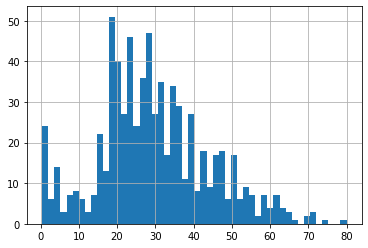

In [42]:
df4['Age'].hist(bins=50)

In [43]:
extreme=df4['Age'].mean()+3*df['Age'].std()

In [44]:
median1=df4['Age']

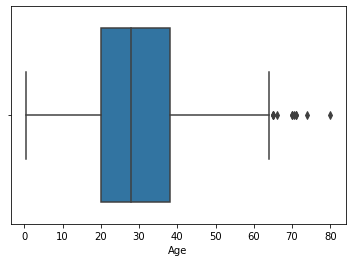

In [45]:
# To Check the outliers through box plot
import seaborn as sns
sns.boxplot(df4['Age'])

In [46]:
def impute_na(data,variable,mdeian,extreme):
    data[variable+'_end_distribution']=data[variable].fillna(extreme)
    data[variable].fillna(median,inplace=True)

In [47]:
impute_na(df4,'Age',df4.Age.median(),extreme)

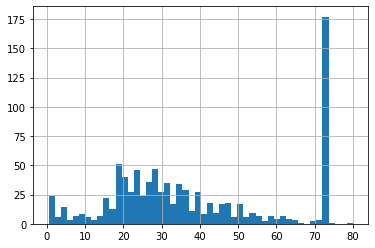

In [48]:
df4.Age_end_distribution.hist(bins=50)

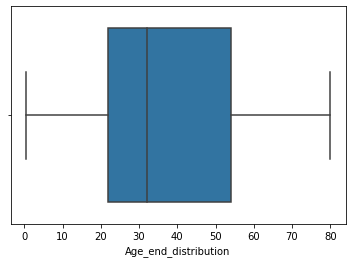

In [50]:
sns.boxplot(df4['Age_end_distribution'])# outliers are removed

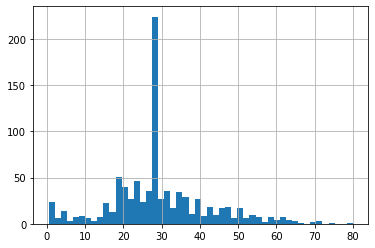

In [52]:
df4['Age'].hist(bins=50)

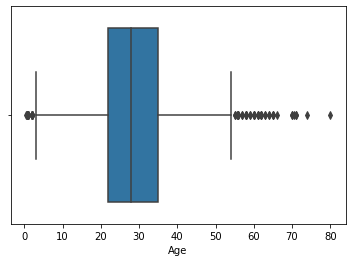

In [54]:
sns.boxplot(df4['Age'])# Having outliers"

# Arbitary Value Imputation

In [56]:
df5= pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [60]:
def impute_n(data,variable):
    data[variable+"_hundered"]=data[variable].fillna(100)
    data[variable+"_zero"]=data[variable].fillna(0)
    #Arbitrary Values
    # It should be more frequently present

In [66]:
impute_n(df5,'Age')

In [69]:
df5.head(10)

,Survived,Age,Fare,Age_hundered,Age_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,100.0,0.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


### How to Handle Categorical Missing Values

##### Frequent Category Imputation


In [74]:
adv_hp=pd.read_csv("Advance_house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [75]:
adv_hp.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [76]:
adv_hp.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [77]:
adv_hp.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [78]:
adv_hp.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

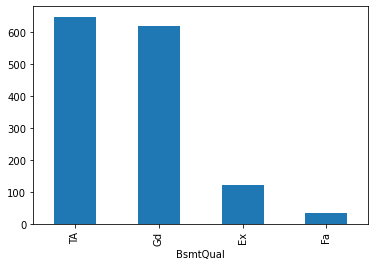

In [86]:
adv_hp.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

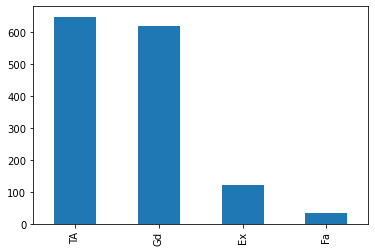

In [90]:
adv_hp['BsmtQual'].value_counts().plot.bar() # Both Ways work same

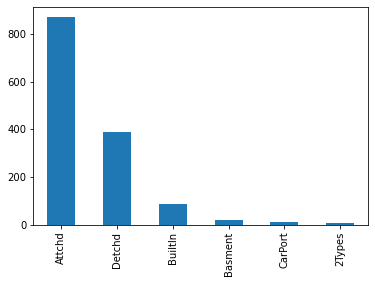

In [93]:
adv_hp['GarageType'].value_counts().plot.bar() 

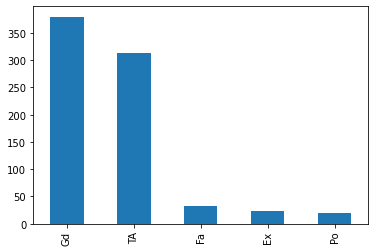

In [94]:
adv_hp['FireplaceQu'].value_counts().plot.bar() 

In [96]:
adv_hp['GarageType'].value_counts().index[0]

'Attchd'

In [105]:
adv_hp['GarageType'].mode()[0]

'Attchd'

In [108]:
def impute_nval(data,variable):
    most_frequent_category=data[variable].mode()[0]
    data[variable].fillna(most_frequent_category, inplace=True)

In [109]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nval(adv_hp,feature)

In [111]:
adv_hp.head(100)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
95,Gd,TA,BuiltIn,185000
96,Gd,Gd,Attchd,214000
97,TA,Gd,Attchd,94750
98,TA,Gd,Basment,83000


In [112]:
adv_hp.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Adding a Variable Capture NAN

In [113]:
adv_hp1=pd.read_csv("Advance_house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [114]:
adv_hp1['BsmtQual_var']=np.where(adv_hp1['BsmtQual'].isnull(),1,0)

In [116]:
adv_hp1.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [117]:
frequent=adv_hp1['BsmtQual'].mode()[0]

In [118]:
adv_hp1.fillna(frequent,inplace=True)

In [122]:
adv_hp1['FireplaceQu_var']=np.where(adv_hp1['FireplaceQu'].isnull(),1,0)
frequent1=adv_hp1['FireplaceQu'].mode()[0]
adv_hp1['FireplaceQu'].fillna(frequent1,inplace=True)

In [124]:
adv_hp1.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,TA,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,TA,Attchd,143000,0,0
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


## Suppose if you have more frequent categories we Just replace NAN with New Category

In [126]:
adv_hp2=pd.read_csv("Advance_house.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [127]:
adv_hp2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [128]:
def impute_nval1(data,variable):
    data[variable+"newvar"]=np.where(adv_hp2[variable].isnull(),"Missing",data[variable])

In [131]:
for feature2 in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nval1(adv_hp2,feature2)

In [132]:
adv_hp2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [133]:
adv_hp2.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
